# Лабораторная работа №2

Давыдов Егор, 7 Вариант

## NumPy vs Pytorch

In [4]:
import torch
import numpy as np

x = np.arange(16).reshape(4, 4)

print(f'X :\n {x}')
print(f'add 5 :\n {x + 5}')
print(f'X*X^T  :\n {np.dot(x, x.T)}')
print(f'mean over cols :\n {x.mean(axis=-1)}')
print(f'cumsum of cols :\n {np.cumsum(x, axis=0)}' )

x = torch.from_numpy(x).type(torch.FloatTensor)

print(f'X :\n {x}')
print(f'add 5 :\n {x + 5}')
print(f'X*X^T  :\n {torch.matmul(x, x.transpose(1, 0))}')
print(f'mean over cols :\n {torch.mean(x, dim=-1)}')
print(f'cumsum of cols :\n {torch.cumsum(x, dim=0)}')

x = torch.linspace(0, 2 * np.pi, 16, dtype=torch.float64)
out = torch.sin(x)**2 + torch.cos(x)**2

print(out.numpy())

X :
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
add 5 :
 [[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]
X*X^T  :
 [[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]
mean over cols :
 [ 1.5  5.5  9.5 13.5]
cumsum of cols :
 [[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]
X :
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
add 5 :
 tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T  :
 tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over cols :
 tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
cumsum of cols :
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Пример линейной регрессии на датасете California

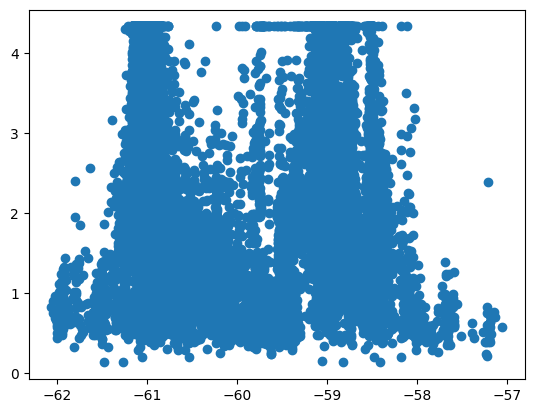

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

#select one column for simplicity. 
x = X[:, -1] / X[:, -1].std()
y = y / y.std()

plt.scatter(x, y);

In [6]:
# model tensors
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# data tensors
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# все тензоры являются leaf-tensors
# x и y не требуют вычисления градиентов
for vv in [w, b, x, y]:
    print(vv.is_leaf, vv.requires_grad)

True True
True True
True False
True False


In [7]:
#try out gradients
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)

loss.backward()

#now w.grad is a tensor containing gradient of L w.r.t. w

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

# no gradients for tensors with requires_grad=False
# and non-leaf tensors
print("Non-Leaf x dL/dx = \n", x.grad)
print("Non-Leaf loss dL/dpred = \n", y_pred.grad)

dL/dw = 
 tensor([214.0627])
dL/db = 
 tensor([-3.5852])
Non-Leaf x dL/dx = 
 None
Non-Leaf loss dL/dpred = 
 None


C:\Users\Egor Davydov\AppData\Local\Temp\ipykernel_15824\3846789532.py:15: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten\src\ATen/core/TensorBody.h:494.)
  print("Non-Leaf loss dL/dpred = \n", y_pred.grad)


## Градиенты промежуточных вершин

In [8]:
y_pred = w * x + b

# check this:
y_pred.retain_grad()

loss = torch.mean((y_pred - y)**2)
loss.backward()

print("Non-Leaf loss dL/dpred = \n", y_pred.grad[:10])

Non-Leaf loss dL/dpred = 
 tensor([-0.0004, -0.0003, -0.0003, -0.0003, -0.0003, -0.0002, -0.0003, -0.0002,
        -0.0002, -0.0002])


## Линейная регрессия

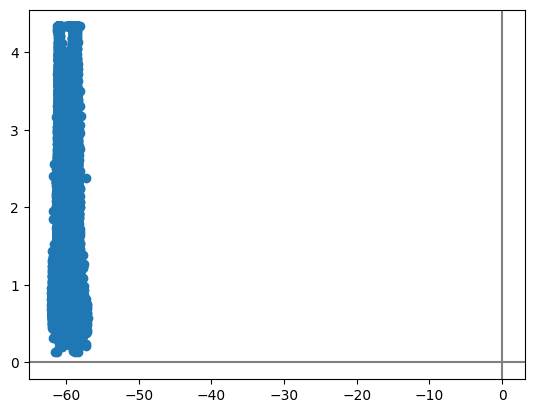

loss =  nan


In [12]:
from IPython.display import clear_output

for i in range(100):
    
    #compute loss
    y_pred = w * x  + b
    loss = torch.mean((y_pred - y)**2)
    
    # backprop
    loss.backward()
    
    learning_rate = 0.1
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad
    
    #zero gradients
    w.grad.zero_()
    b.grad.zero_()
    
    #the rest of code is just bells and whistles
    if (i + 1) % 5==0:
        #draw linear regression prediction vs data
        clear_output(True)
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.scatter(x.numpy(),y.numpy())
        plt.plot(x.numpy(),y_pred.data.numpy(),color='orange')
        plt.show()

        print("loss = ", loss.item())
        if loss.item() < 0.5:
            print("Done!")
            break

## Оптимизаторы

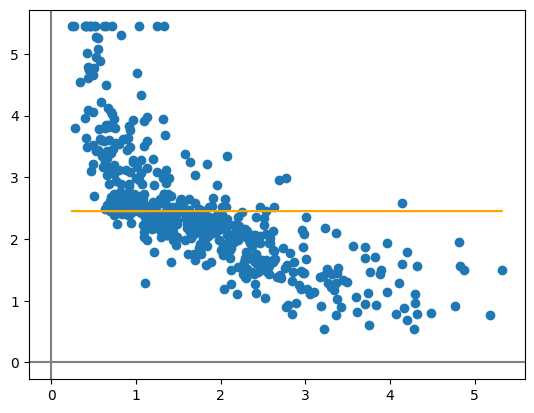

loss =  1.0


In [21]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Загрузка данных из источника
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Нормализация данных
x = data / data.std(axis=0)
y = target / target.std()

x = x[:, -1].reshape(-1, 1)

# Преобразование в тензоры PyTorch
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Инициализация параметров модели
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# Определение оптимизатора
opt = torch.optim.RMSprop([w, b], lr=0.1)

# Обучение модели
for i in range(100):
    # Вычисление функции потерь
    y_pred = w * x + b
    loss = torch.mean((y_pred - y)**2)
    
    # Обратное распространение и шаг градиентного спуска
    loss.backward()
    opt.step()
    opt.zero_grad()
    
    # Отображение результатов
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), y_pred.data.numpy(), color='orange')
        plt.show()

        print("loss = ", loss.item())
        if loss.item() < 0.5:
            print("Done!")
            break

## Высокоуровневые API

100%|█████████████████████████████████████████████████████████████████████| 9912422/9912422 [02:00<00:00, 82287.60it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 134252.72it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|█████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:20<00:00, 78685.38it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<?, ?it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



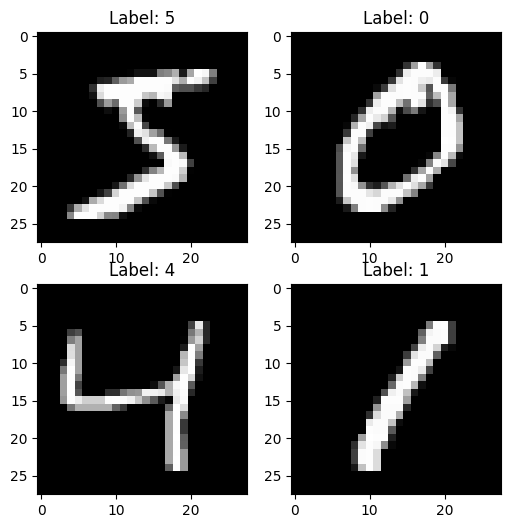

In [25]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Загрузка данных MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Первые 4 изображения из обучающего набора данных
plt.figure(figsize=[6, 6])
for i in range(4):
    plt.subplot(2, 2, i + 1)
    image, label = train_data[i]
    plt.title(f"Label: {label}")
    plt.imshow(image.squeeze().numpy(), cmap='gray')

plt.show()